# Data release tutorial for Tests of General Relativity with GW170817

This notebook serves as a tutorial for loading and viewing data released in association with the publication **Tests of General Relativity with GW170817** (https://dcc.ligo.org/LIGO-P1800059/public)

In [1]:
public_dcc_url ='https://dcc.ligo.org/LIGO-P1800059/public'

This notebook uses `numpy` (http://www.numpy.org/) to read the data files and `scipy` (https://www.scipy.org) to do some of the analyses.  We use `matplotlib` (https://matplotlib.org/) and `seaborn` (https://seaborn.pydata.org/) to produce the figures.

In [2]:
#Used for data analysis
import numpy as np
import scipy as sp

#Used for plotting
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt


import seaborn as sns

Configure plotting options to match published figures

In [3]:
sns.set_palette('colorblind')
sns.set_style("ticks")

matplotlib.rc('text.latex', preamble = '\usepackage{txfonts}')
matplotlib.rc('text', usetex=True)
matplotlib.rc('font', family='serif')
matplotlib.rc('font', serif='times')
matplotlib.rc('mathtext', default='sf')
matplotlib.rc('axes', labelsize=18)
matplotlib.rc('legend', fontsize=16)
matplotlib.rc('xtick', labelsize=12)
matplotlib.rc('ytick', labelsize=12)


## Download and read posterior samples

We download the released eleven-dimensional posterior samples for the parameterized tests of the binary dynamics. The samples can be found in the tarballs `phenompnrt_posteriors.tar.gz` and `seobnrt_posteriors.tar.gz` files for the `PhenomPNRT` and `SEOBNRT` waveforms, respectively. The tarballs contain posterior samples for the tests of each post-Newtonian coefficient. See the paper for details.

In [4]:
!curl -OL {public_dcc_url}"phenompnrt_posteriors.tar.gz"
!curl -OL {public_dcc_url}"seobnrt_posteriors.tar.gz"

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   161  100   161    0     0    148      0  0:00:01  0:00:01 --:--:--   148
100 6563k  100 6563k    0     0  1789k      0  0:00:03  0:00:03 --:--:-- 18.6M
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   158  100   158    0     0    276      0 --:--:-- --:--:-- --:--:--   276
100 11.2M  100 11.2M    0     0  1291k      0  0:00:08  0:00:08 --:--:-- 1876k


Unpack tarballs

In [5]:
!tar xzf phenompnrt_posteriors.tar.gz
!tar xzf seobnrt_posteriors.tar.gz

Read the posterior samples and store in the notebook. We can access each waveform type's data using `posterior_samples[<waveform type>][<PN_order>][<param>]`.

In [6]:
posterior_samples = {'PhenomPNRT':{}, 'SEOBNRT':{}}

pn_parameters = {'-1PN':'dchiminus2', '0PN':'dchi0', '0.5PN':'dchi1', '1PN':'dchi2', '1.5PN':'dchi3', \
                 '2PN':'dchi4', '2.5PN(l)':'dchi5l', '3PN':'dchi6', '3PN(l)':'dchi6l', '3.5PN':'dchi7'}

for pn_order in pn_parameters:
    posterior_samples['PhenomPNRT'][pn_order] = np.genfromtxt('phenompnrt_%s.dat'%(pn_parameters[pn_order]),names=True)
    posterior_samples['SEOBNRT'][pn_order] = np.genfromtxt('seobnrt_%s.dat'%(pn_parameters[pn_order]),names=True)
    
pn_labels = {'-1PN':r'$\delta\hat{\varphi}_{-2}$', '0PN':r'$\delta\hat{\varphi}_{0}$',\
             '0.5PN':r'$\delta\hat{\varphi}_{1}$', '1PN':r'$\delta\hat{\varphi}_{2}$',\
             '1.5PN':r'$\delta\hat{\varphi}_{3}$', '2PN':r'$\delta\hat{\varphi}_{4}$',\
             '2.5PN(l)':r'$\delta\hat{\varphi}_{5}^{(\ell)}$', '3PN':r'$\delta\hat{\varphi}_{6}$',
             '3PN(l)':r'$\delta\hat{\varphi}_{6}^{(\ell)}$', '3.5PN':r'$\delta\hat{\varphi}_{7}$'}

In [7]:
posterior_samples['PhenomPNRT']['0PN'].dtype

dtype([('distance', '<f8'), ('costheta_jn', '<f8'), ('m1', '<f8'), ('m2', '<f8'), ('a1', '<f8'), ('a2', '<f8'), ('costilt1', '<f8'), ('costilt2', '<f8'), ('lambda1', '<f8'), ('lambda2', '<f8'), ('dchi0', '<f8')])

Here are some brief descriptions of these parameters and their uses:

distance: luminosity distance [Mpc]

costheta_jn: cosine of the angle between line of sight and total angular momentum vector of system [dimensionless]

m1: mass of the primary (larger) body (detector frame) [solar mass]

m2: mass of the secondary (smaller) body (detector frame) [solar mass]

a1, costilt1: spin magnitude and cosine of zenith angle between the spin and the orbital angular 
momentum vector of system for the primary (larger) body [dimensionless]

a2, costilt2: spin magnitude and cosine of zenith angle between the spin and the orbital angular momentum vector of system for the secondary (smaller) body [dimensionless]

lambda1: tidal deformability of the primary (larger) body [dimensionless]

lambda2: tidal deformability of the secondary (smaller) body [dimensionless]

dchi{n}: Deviation of the n/2-PN coefficient in the phase evolution [dimensionless]. For -1PN and 0.5PN tests (dchiminus2 and dchi1, respectively), these represent absolute deviations; for all other PN coefficients, this quantity represent fractional deviations. See the paper for details.

As discussed in the paper, the PhenomPNRT and SEOBNRT waveforms use slightly different parameterizations for the deviations from GR. The figures shown in the paper correspond to the PhenomPNRT parameterization. We download and import the python module `reparameterize_posteriors.py` to convert the SEOBNRT posteriors to the PhenomPNRT parameterization.

In [8]:
!curl -OL {public_dcc_url}"reparameterize_posteriors.py"
    
from reparameterize_posteriors import convert_SEOBNRT_to_PhenomPNRT_parameterization

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   161  100   161    0     0    154      0  0:00:01  0:00:01 --:--:--   154
100 10843  100 10843    0     0   6178      0  0:00:01  0:00:01 --:--:--  6178


We convert the SEOBNRT posteriors to the PhenomPNRT parameterization and store in `posterior_samples['SEOBNRT_reparameterized'][<PN_order>][dchi{n}]` for future use. Note that there is not a one-to-one correspondence between the points in `posterior_samples['SEOBNRT']` and `posterior_samples['SEOBNRT_reparameterized']`.

In [9]:
posterior_samples['SEOBNRT_reparameterized'] = {}

for pn_order in ['-1PN','0PN','0.5PN','1PN','1.5PN','2PN','2.5PN(l)','3PN','3PN(l)','3.5PN']:
        posterior_samples['SEOBNRT_reparameterized'][pn_order] = {}
        posterior_samples['SEOBNRT_reparameterized'][pn_order][pn_parameters[pn_order]]=convert_SEOBNRT_to_PhenomPNRT_parameterization(posterior_samples['SEOBNRT'][pn_order],\
                                                                                                         pn_parameters[pn_order])




We plot the 1D marginalized posterior distribution function on the deviations from GR at each post-Newtonian order. The SEOBNRT posteriors are re-parameterized as in the paper.

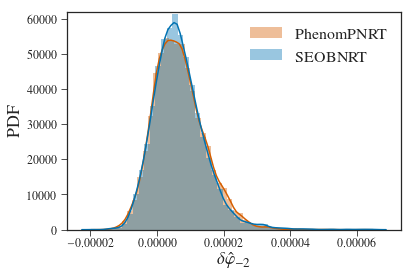

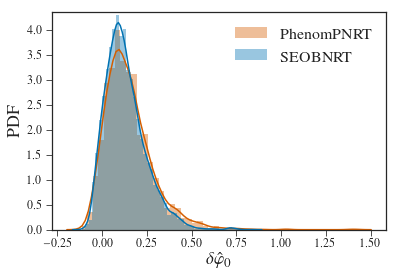

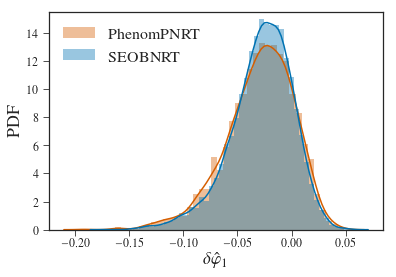

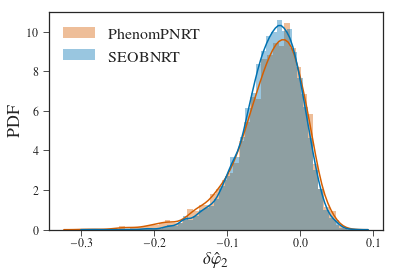

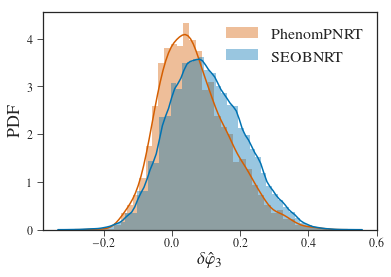

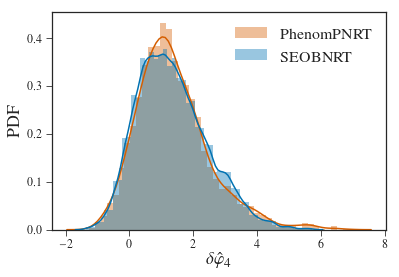

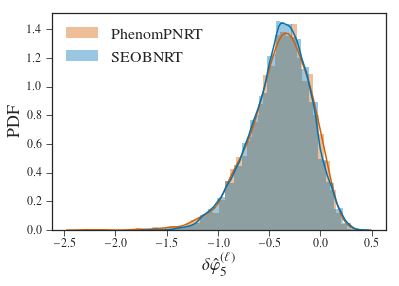

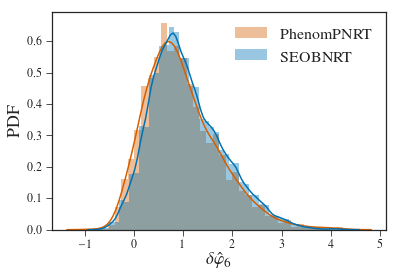

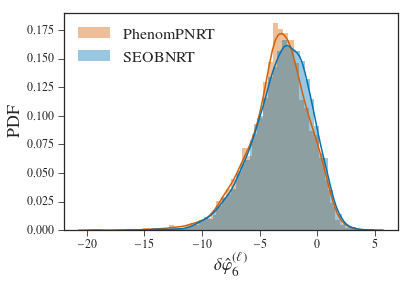

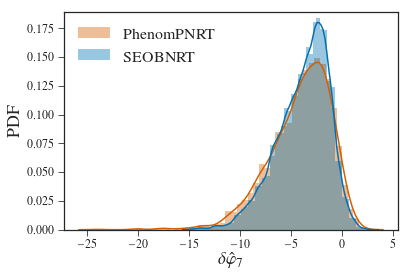

In [10]:
for pn_order in ['-1PN','0PN','0.5PN','1PN','1.5PN','2PN','2.5PN(l)','3PN','3PN(l)','3.5PN']:

    sns.distplot(posterior_samples['PhenomPNRT'][pn_order][pn_parameters[pn_order]], hist=True,\
             color=sns.color_palette()[2], label='PhenomPNRT')
    sns.distplot(posterior_samples['SEOBNRT_reparameterized'][pn_order][pn_parameters[pn_order]],\
             hist=True, color=sns.color_palette()[0], label='SEOBNRT')
    
    plt.xlabel(pn_labels[pn_order])
    plt.ylabel('PDF')
    plt.legend()
    plt.show()

## Figure 1

We plot the violin plot shown in Figure 1 of the paper. The SEOBNRT posteriors are re-parameterized as in the paper.

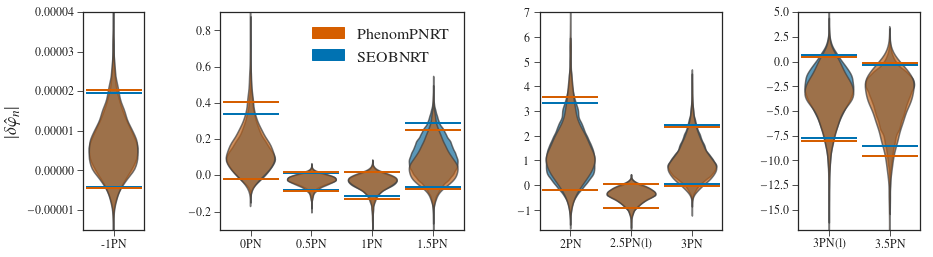

In [11]:
sections = [['-1PN'], ['0PN', '0.5PN', '1PN', '1.5PN'], ['2PN', '2.5PN(l)', '3PN'], ['3PN(l)', '3.5PN']]

f, axes = plt.subplots(figsize=(15,4), nrows=1, ncols=len(sections),\
                       gridspec_kw={'wspace':0.5,'width_ratios':map(lambda x: len(x),sections)})

colors = {'PhenomPNRT':sns.color_palette()[2], 'SEOBNRT_reparameterized':sns.color_palette()[0]}

for (ax, pn_orders) in zip(axes,sections):
    for waveform in ['SEOBNRT_reparameterized','PhenomPNRT']:
        
        # Plot marginalized posterior distribution function for dchi{n}
        sns.violinplot(data = [posterior_samples[waveform][pn_order][pn_parameters[pn_order]] \
                               for pn_order in pn_orders], scale='width',\
                       color=colors[waveform], inner = None, bw='silverman', ax=ax,label="b")
       
        # Plot error bars corresponding to 90% credible region
        for i, pn_order in enumerate(pn_orders):

            med = np.median(posterior_samples[waveform][pn_order][pn_parameters[pn_order]])
            perc_05 = np.percentile(posterior_samples[waveform][pn_order][pn_parameters[pn_order]],5)
            perc_95 = np.percentile(posterior_samples[waveform][pn_order][pn_parameters[pn_order]],95)
            err_low = np.abs(med-perc_05)
            err_high= np.abs(perc_95-med)
            ax.errorbar(i,med,yerr=[[err_low],[err_high]], ecolor=colors[waveform], marker=None, capthick=2, capsize=28, linewidth=0)

    ax.set_xticklabels(pn_orders)
    plt.setp(ax.collections, alpha=.7)

axes[0].set_ylabel(r'$|\delta\hat \varphi_n|$')

#Hard-coded plot ranges to match figure in paper
axes[0].set_ylim(-0.000015,0.00004)
axes[1].set_ylim(-0.3,0.9)
axes[2].set_ylim(-1.8,7.0)
axes[3].set_ylim(-17.0,5.0)
    
patches = [matplotlib.patches.Patch(color = sns.color_palette()[2],label="PhenomPNRT"),\
                matplotlib.patches.Patch(color = sns.color_palette()[0],label="SEOBNRT")]
axes[1].legend(handles=patches)
plt.show()

## Figure 2

Finally, we construct the marginalized posterior distributions on $|\hat{\varphi}_n|$ and compute the upper bound of the 90% credible region for each waveform model. 

In [12]:
PhenomPNRT_bounds = []
SEOBNRT_bounds = []

bounds = {'PhenomPNRT':PhenomPNRT_bounds, 'SEOBNRT_reparameterized':SEOBNRT_bounds}

for pn_order in ['-1PN','0PN','0.5PN','1PN','1.5PN','2PN','2.5PN(l)','3PN','3PN(l)','3.5PN']:
    
    for waveform in ['PhenomPNRT', 'SEOBNRT_reparameterized']:

        pos_samp = posterior_samples[waveform][pn_order][pn_parameters[pn_order]]

        #Reconstruct posterior distribution function for dchi{n} with kernel density estimation using a Gaussian kernel
        pos_kde = sp.stats.gaussian_kde(pos_samp)
        centers = np.linspace(0.0, 1.05*max(np.abs(pos_samp)), 1000)

        #Compute the posterior distribution function for |dchi{n}|
        counts = pos_kde(centers) + pos_kde(-centers)
        counts[0] /= 2

        #Construct cumulative distribution function from the mode for |dchi{n}| 
        counts_sorted =  np.sort(counts.flatten())[::-1]
        norm_cumsum_counts_sorted = np.cumsum(counts_sorted) / np.sum(counts)
    
        #Compute height of PDF for |dchi{n}| at which the 90% credible region ends
        index_from_level = sp.interpolate.interp1d(norm_cumsum_counts_sorted, np.arange(len(counts)), bounds_error=False, fill_value=(0.,len(counts)))
        height_from_index = sp.interpolate.interp1d(np.arange(len(counts)), counts_sorted, bounds_error=False, fill_value=(counts_sorted[0],0.))
        upper_bound_height = height_from_index(index_from_level(0.9))
    
        #Store value of |dchi{n}| at which the 90% credible region ends
        bounds[waveform].append(np.max(centers[np.where(counts>upper_bound_height)]))
    

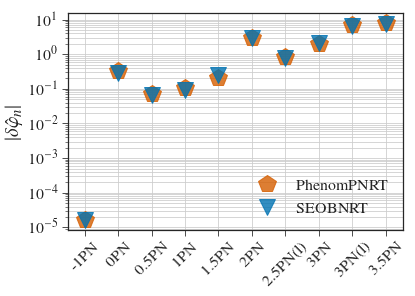

In [13]:
plt.figure()
plt.semilogy(range(10), PhenomPNRT_bounds, linestyle='', marker='p', color=sns.color_palette()[2], markersize=18, alpha=0.8, label='PhenomPNRT')
plt.semilogy(range(10), SEOBNRT_bounds, linestyle='', marker='v', color=sns.color_palette()[0], markersize=16, alpha=0.8, label='SEOBNRT')
plt.xlim(-0.5, 9.5)
plt.ylabel(r'$|\delta\hat \varphi_n|$', size=20)
plt.xticks(range(10), ['-1PN','0PN','0.5PN','1PN','1.5PN','2PN','2.5PN(l)','3PN','3PN(l)','3.5PN'], rotation=45, size=16)
plt.yticks([1e-5,1e-4,1e-3,1e-2,1e-1,1e0,1e1],size=16)
plt.grid(which='major')
plt.grid(which='minor')
plt.legend(loc='lower right')
plt.show()